In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Average household income per municipality
income = pd.read_excel('inkomen.xlsx', skiprows=1, index_col=[0])
income = income.rename(columns={'1 000 euro' : 'Inkomen in 1000 euro'})
income = income.dropna()
income = income.sort_values(by="Regio's")
income['Inkomen in 1000 euro'] = pd.to_numeric(income['Inkomen in 1000 euro'], errors='coerce')

In [4]:
#Average number of cars per household per municipality
cars = pd.read_excel('auto2021.xlsx', skiprows=2, index_col=[0])
cars = cars.dropna()
cars = cars.drop(columns=['Gemeentecode'])
cars = cars.sort_values(by='Gemeentenaam')
cars = cars.rename(index={"'s-Gravenhage":"'s-Gravenhage (gemeente)"})

In [5]:
#Number of charging stations per municipality
charge = pd.read_excel('laadpaal2.xlsx', index_col=[0])
charge = charge.rename(index={"s-Gravenhage (gemeente)":"'s-Gravenhage (gemeente)"})

In [6]:
#Ny
household = pd.read_csv('Huishouden.csv', skiprows=3, sep=';', index_col=[0])
household = household .drop(columns=['Unnamed: 1','Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens',
       'Bevolking|Particuliere huishoudens|Particuliere huishoudens|Meerpersoonshuishoudens zonder kinderen',
       'Bevolking|Particuliere huishoudens|Particuliere huishoudens|Meerpersoonshuishoudens met kinderen'])
household = household.rename(columns={'Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal particuliere huishoudens' : 'aantal huishoudens'})
household = household.dropna()
household = household.drop(index="Regio's")
household.sort_index(inplace=True)
household['aantal huishoudens'] = pd.to_numeric(household['aantal huishoudens'], errors='coerce')


In [9]:
elektric_car = pd.read_excel('elektrisch.xlsx', index_col=[0])
elektric_car = elektric_car.sort_values(by='Gemeentenaam ')
elektric_car['Income'] = income['Inkomen in 1000 euro']

In [10]:
#Calculations to get the needed values out of the databases.
#1: Calculate number of cars per household * percentage of electric cars per household
elektric_car['aantal elektrische per gemeente'] = cars["Personenauto's per huishouden (afgerond)"] * (elektric_car['% autobezitters met stekkerauto (%) ']/100)

#2: Calculate amount of charging stations per municipality to charging stations per household 
elektric_car['aantal laadpalen per huishouden'] = charge['Aantal laadpalen'] / household['aantal huishoudens']

#3: Calculate amount of charging stations present per car in a municipality
elektric_car['Ratio paal-auto'] = elektric_car['aantal laadpalen per huishouden'] / elektric_car['aantal elektrische per gemeente'] 


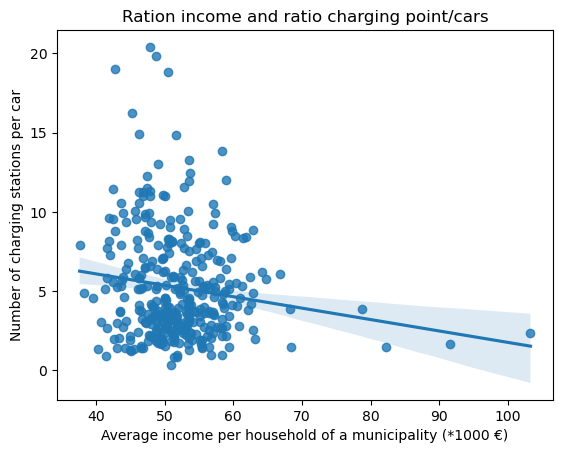

In [25]:
# Number of charging stations / average income per municipality
sns.regplot(x='Income', y='Ratio paal-auto', data=elektric_car)
plt.title('Ration income and ratio charging point/cars')
plt.xlabel('Average income per household of a municipality (*1000 €)')
plt.ylabel('Number of charging stations per car')
plt.show()

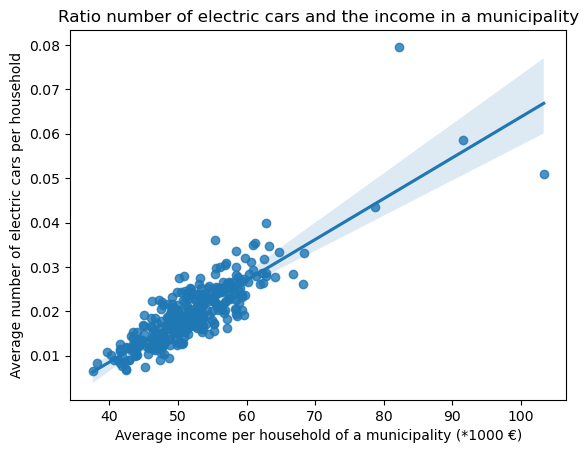

In [26]:
#print verhouding aantal elektrische auto's en het inkomen
sns.regplot(x='Income', y='aantal elektrische per gemeente', data=elektric_car)

plt.title('Ratio number of electric cars and the income in a municipality')
plt.xlabel('Average income per household of a municipality (*1000 €)')
plt.ylabel('Average number of electric cars per household')

plt.show()

Text(0, 0.5, 'Average number of charging points per household')

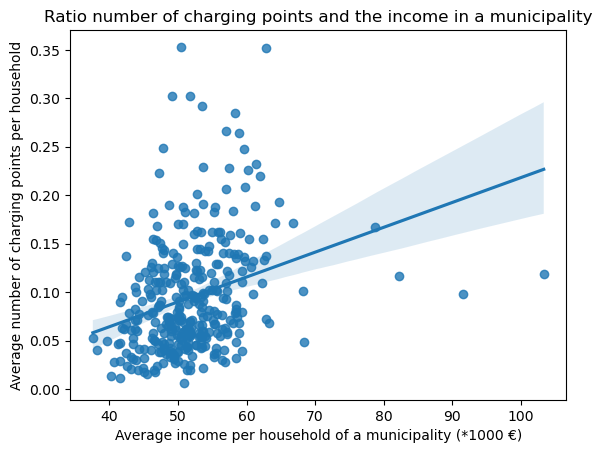

In [27]:
# Print verhouding laadpalen per huishouden en inkomen per gemeente 
sns.regplot(x='Income', y='aantal laadpalen per huishouden', data=elektric_car)
plt.title('Ratio number of charging points and the income in a municipality')
plt.xlabel('Average income per household of a municipality (*1000 €)')
plt.ylabel('Average number of charging points per household')
